# Examining output of the initial experiment
1 floe, and haven't done the SD or Re measures yet

In [278]:
import pandas as pd
import os

data = []
for fname in os.listdir('../data/rotate_rescale/'):
    if '.csv' in fname:
        df = pd.read_csv('../data/rotate_rescale/' + fname)
    df['case'] = fname.split('_')[-1].replace('.csv', '')
    data.append(df)
df = pd.concat(data)

In [279]:
import numpy as np
df['rotation_error'] = np.abs((np.deg2rad(df['est_rotation']) - np.deg2rad(df['rotation']))/(2*np.pi))

In [250]:
df.groupby('floe_id').mean()

,scale,rotation,area,convex_area,major_axis_length,minor_axis_length,adr_area,adr_convex_area,adr_major_axis_length,adr_minor_axis_length,est_rotation,mismatch,recall,normalized_sd,rotation_error
floe_id,,,,,,,,,,,,,,,
1,0.583333,0.0,4047.890710,4223.120219,65.532772,62.051621,0.002253,0.007805,0.002762,0.002269,27.846835,0.022548,0.0,0.0,0.128089
2,0.583333,0.0,402.431694,429.939891,22.996469,17.450763,0.010033,0.025171,0.012058,0.009472,41.762813,0.022953,0.0,0.0,0.128038
3,0.583333,0.0,238.109290,253.092896,18.233566,13.024116,0.044912,0.046343,0.041751,0.049127,42.012201,0.031887,0.0,0.0,0.129302
4,0.583333,0.0,312.355191,337.551913,19.691071,16.903946,0.013482,0.032107,0.020126,0.013506,36.035629,0.035369,0.0,0.0,0.129437
5,0.583333,0.0,282.781421,302.327869,23.488185,11.980555,0.019238,0.026835,0.013557,0.012271,42.481252,0.042180,0.0,0.0,0.127205
6,0.583333,0.0,397.426230,426.721311,25.653577,15.536125,0.013609,0.020372,0.022655,0.021633,42.657428,0.033381,0.0,0.0,0.127928
7,0.583333,0.0,266.196721,286.284153,25.043277,10.875626,0.025112,0.030010,0.013736,0.020588,42.527576,0.044790,0.0,0.0,0.127314


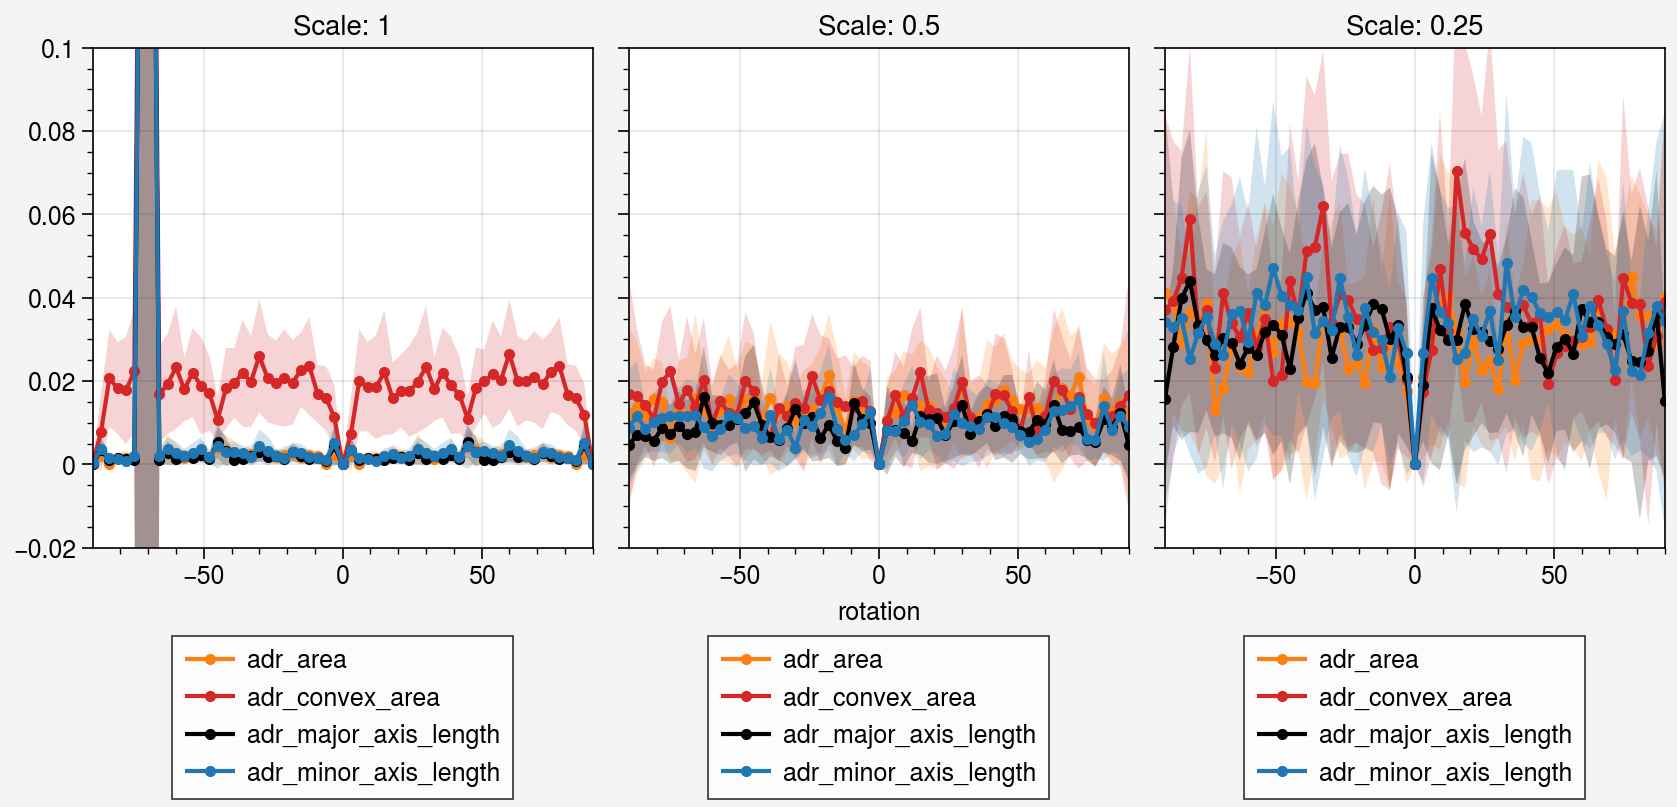

In [290]:
import proplot as pplt
fig, axs = pplt.subplots(ncols=3)
data = df.copy()
for size, ax in zip([1, 0.5, 0.25], axs):
    A = data.loc[data['scale'] == size, "area"].mean()
    for c, measure in zip(['tab:orange', 'tab:red', 'k', 'tab:blue', 'tab:green', 'gray'],
                          ['adr_area', 'adr_convex_area', 'adr_major_axis_length',
                           'adr_minor_axis_length']):
        d_mean = data.loc[data['scale']==size, ['rotation', measure]].groupby('rotation').mean()
        d_std = data.loc[data['scale']==size, ['rotation', measure]].groupby('rotation').std()
        ax.plot(d_mean, fadedata=d_std.squeeze(), marker='.', color=c,
                label=measure, ls='-', alpha=1)
    ax.format(title="Scale: " + str(size), ylim=(-0.02, 0.1))
    ax.legend(ncols=1, loc='b')

(array([685., 143.,  97.,  96.,  51.,  96.,  73.,  91.,  89.,  58.]),
 array([-7.73480059,  1.84371615, 11.4222329 , 21.00074964, 30.57926638,
        40.15778312, 49.73629986, 59.3148166 , 68.89333334, 78.47185009,
        88.05036683]),
 <BarContainer object of 10 artists>)

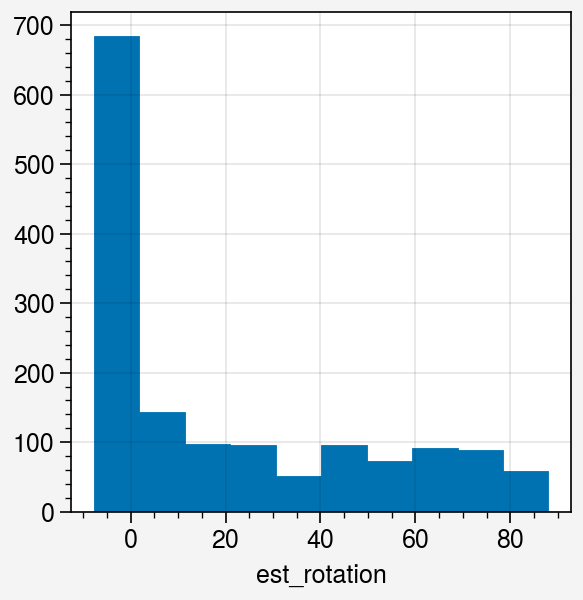

In [282]:
fig, ax = pplt.subplots()
ax.hist(data.loc[np.abs(data.rotation) < 45, ['rotation', 'est_rotation']].diff(axis=1)['est_rotation'])

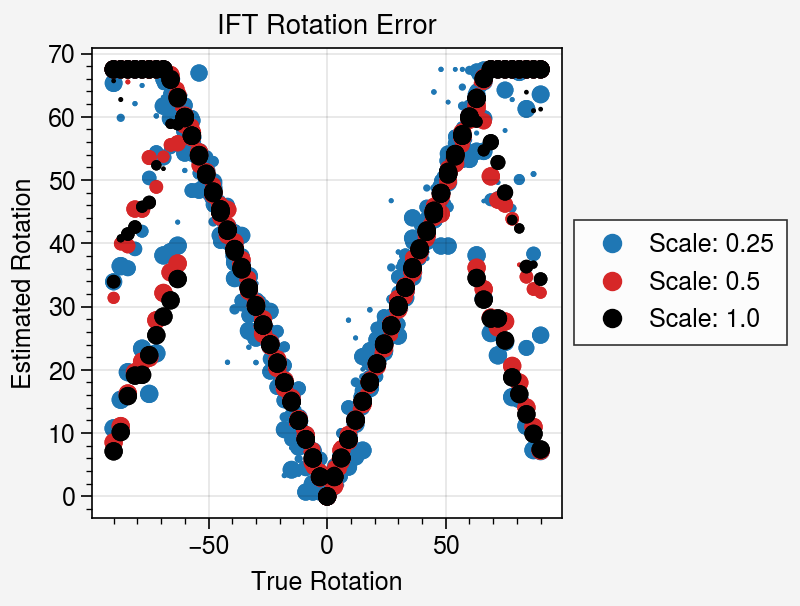

In [283]:
fig, ax = pplt.subplots(width=4)
scale_colors = {0.25: 'tab:blue', 0.5: 'tab:red', 1.0: 'k'}
for s, df_scale in df.groupby('scale'):
    for f, df_floe in df_scale.groupby('floe_id'):
        ax.scatter(df_floe['rotation'], df_floe['est_rotation'], marker='o', color=scale_colors[s],
               ms=np.sqrt(df_floe['area']), label='')
for label in scale_colors:
    ax.plot([],[],m='o', lw=0, c=scale_colors[label], label='Scale: ' + str(label))
ax.legend(ncols=1, loc='r')
ax.format(xlabel='True Rotation', ylabel='Estimated Rotation', title='IFT Rotation Error')

In [285]:
df['err_rotation'] = df['est_rotation'] - df['rotation']

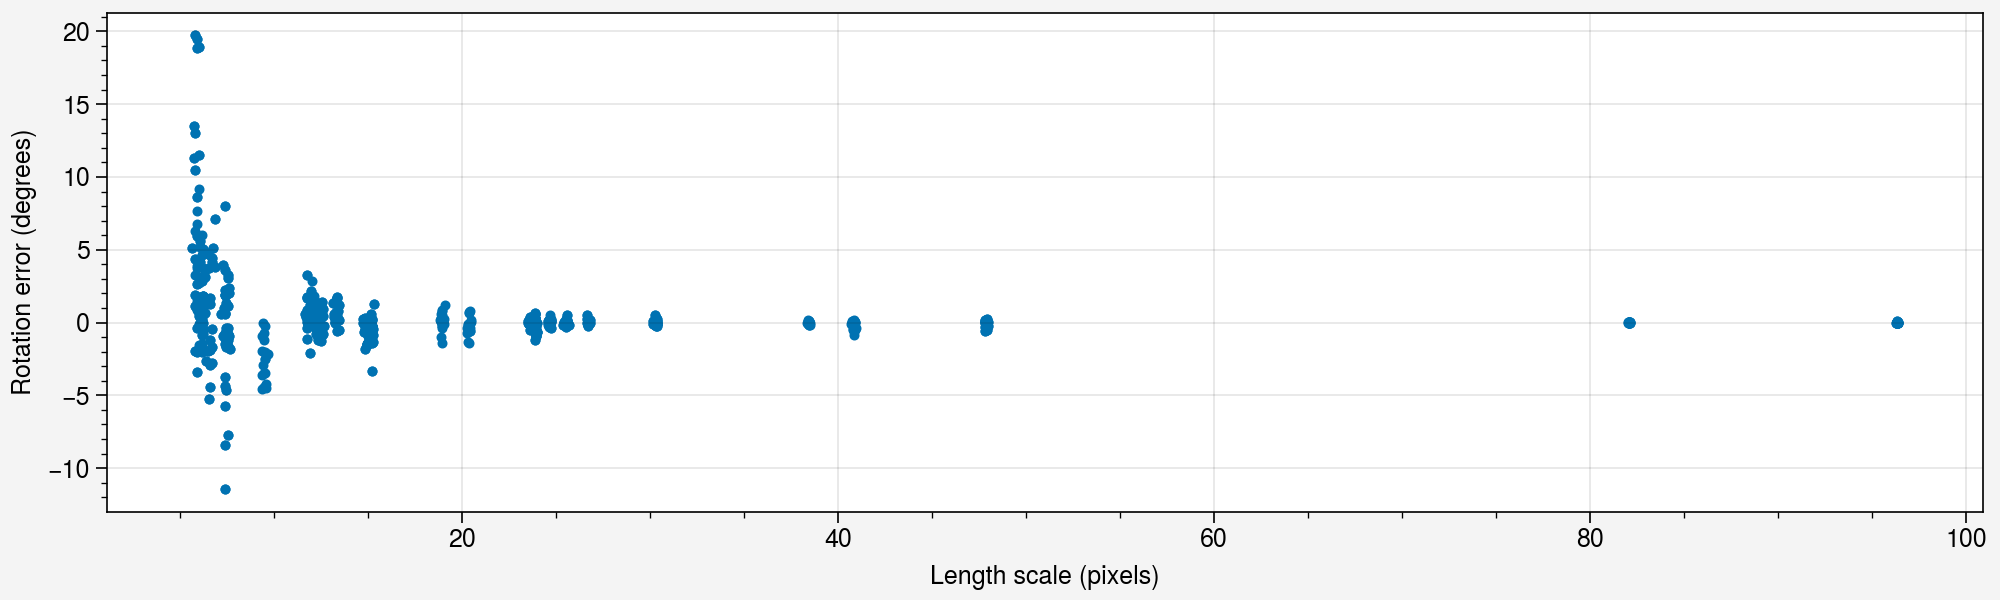

In [286]:
fig, ax = pplt.subplots(width=10, height=3)
idx = (0 < df['rotation']) & (df['rotation'] < 60) 
ax.scatter((df.loc[idx, 'area'].values)**0.5,
           df.loc[idx, 'err_rotation'].values, marker='.')
ax.format(xlabel='Length scale (pixels)')
ax.format(ylabel='Rotation error (degrees)')

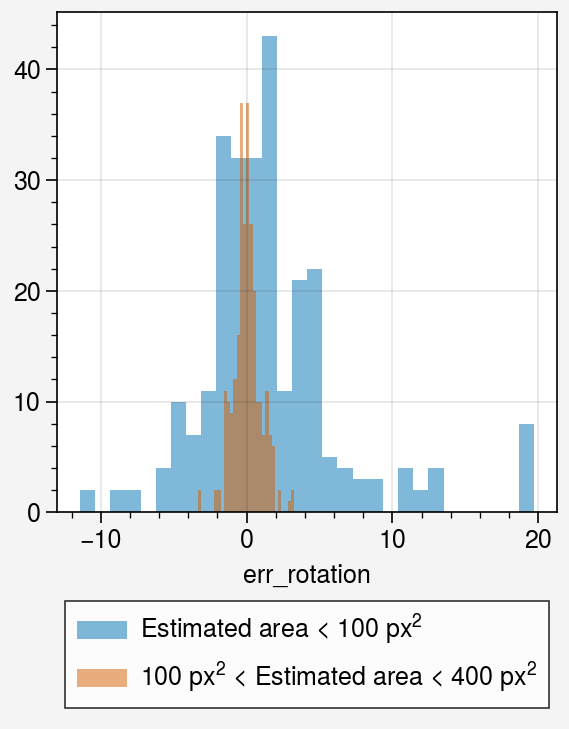

In [289]:
fig, ax = pplt.subplots()
idx = (0 < df['rotation']) & (df['rotation'] < 60) 
idx = idx & (df['area'].values**0.5 < 10)
ax.hist(df.loc[idx, 'err_rotation'], bins=30, alpha=0.5, label='Estimated area < 100 px$^2$')

idx = (0 < df['rotation']) & (df['rotation'] < 60) 
idx = idx & ((df['area'].values**0.5 > 10) & (df['area'].values**0.5 < 20))
ax.hist(df.loc[idx, 'err_rotation'], bins=30, alpha=0.5, label='100 px$^2$ < Estimated area < 400 px$^2$')
ax.legend(loc='b', ncols=1)

In [247]:

fig, ax = pplt.subplots(width=10, height=3)
# idx = (0 < df['rotation']) & (df['rotation'] < 60) 
ax.scatter((df.loc[idx, 'area'].values)**0.5,
           df.loc[idx, 'err_area'].values, marker='.')
ax.format(xlabel='Length scale (pixels)')
ax.format(ylabel='Rotation error (degrees)')

1.1780972450961724

1471.0


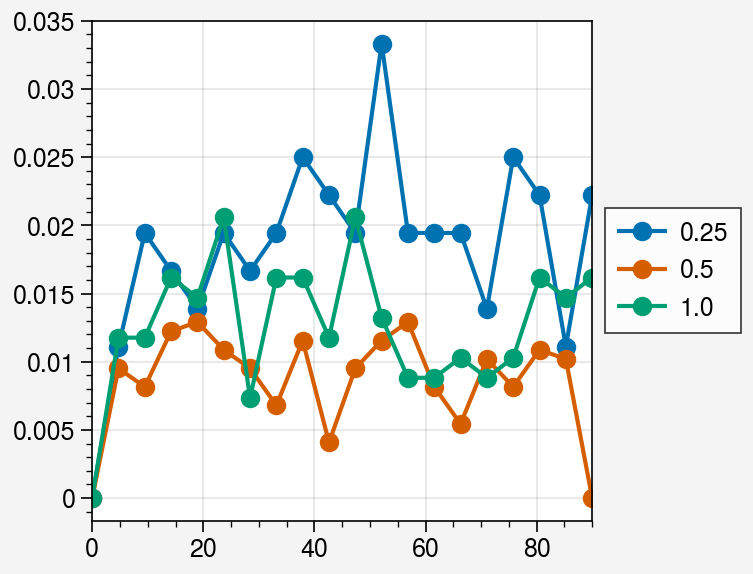

In [181]:
fig, ax = pplt.subplots()
print(df.loc[df.floe_id==1].area.max())
for s, data in df.loc[df.floe_id==1].groupby('size'):
    ax.plot(data['rotation'].values,
            1-(data['area']/data['area'].values[0]).values, marker='o',
           label=s)
    # ax.plot(data['rotation'].values,
    #         data['adr_area'].values, marker='', ls='--',
    #        label=s)

ax.legend(ncols=1, loc='r')
# ax.format(ylim=(-0.25, 0.25), xlabel='rotation')
# ax.format(ylim=(0, np.pi), xlim=(0, np.pi))

1471.0


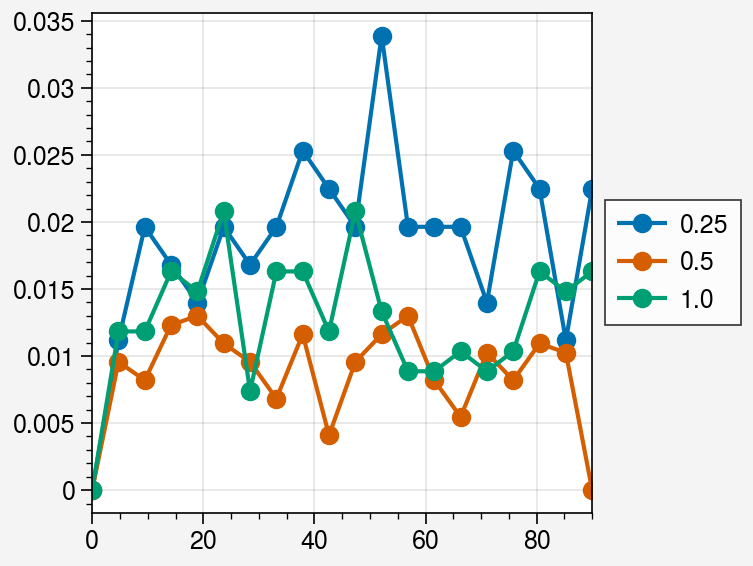

In [177]:
fig, ax = pplt.subplots()
print(df.loc[df.floe_id==1].area.max())
for s, data in df.loc[df.floe_id==1].groupby('size'):
    ax.plot(data['rotation'].values,
            data['adr_area'].values, marker='o',
           label=s)
ax.legend(ncols=1, loc='r')
# ax.format(ylim=(-0.25, 0.25), xlabel='rotation')
# ax.format(ylim=(0, np.pi), xlim=(0, np.pi))

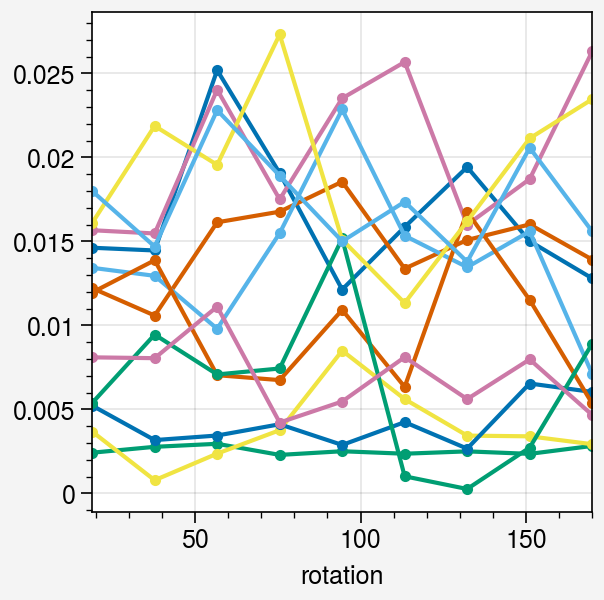

In [141]:
test = df.loc[df["size"]==1].groupby('floe_id').max()

fig, ax = pplt.subplots()
for floe_id in df['floe_id'].unique():
    ax.plot(df.where(df.rotation > 0).loc[(df["size"]==1) & (df['floe_id'] == floe_id),
            ['rotation', 'adr_major_axis_length']].set_index('rotation'), ls='-', marker='.')

In [138]:
# next steps
# double check the rotation images. Do they look okay? how do the sizes compare?
# Should we expect smaller ratios?
# Describe how to go from "variation under rotation" to "variation between floes" on this measure

Index(['floe_id', 'size', 'rotation', 'area', 'convex_area',
       'major_axis_length', 'minor_axis_length', 'adr_area', 'adr_convex_area',
       'adr_major_axis_length', 'adr_minor_axis_length', 'est_rotation',
       'mismatch', 'recall', 'normalized_sd', 'rotation_error'],
      dtype='object')